In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# reading the dataset using read_csv
df = pd.read_csv("D:\Priti_Modi\Files\Electric_Production.csv",parse_dates=True,index_col="DATE")

# displaying the first five rows of dataset
display(df)

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [9]:
na = df['IPG2211A2N'].isnull().values.any()
print(na)

False


<Axes: xlabel='DATE'>

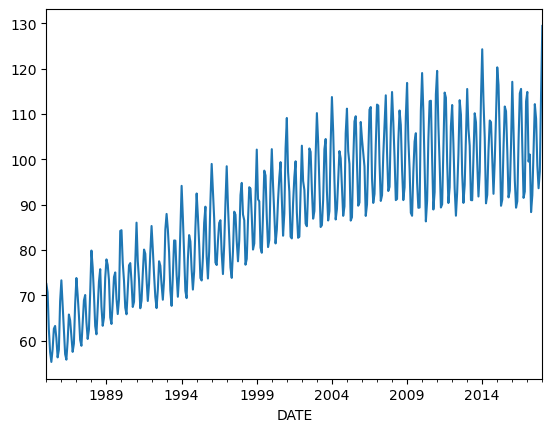

In [10]:
df['IPG2211A2N'].plot()

(array([20., 36., 48., 46., 82., 61., 49., 41., 12.,  2.]),
 array([ 55.3151 ,  62.72407,  70.13304,  77.54201,  84.95098,  92.35995,
         99.76892, 107.17789, 114.58686, 121.99583, 129.4048 ]),
 <BarContainer object of 10 artists>)

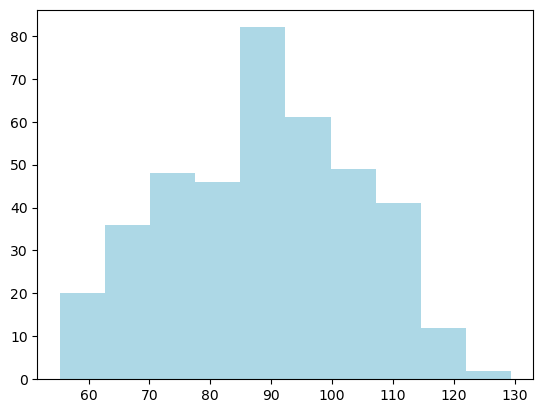

In [11]:
# plt.hist(df["IPG2211A2N"],color="lightblue")
plt.hist(df,color="lightblue")

In [37]:
ndf = df['IPG2211A2N'].resample('AS').sum()

In [38]:
display(ndf)

DATE
1985-01-01     745.9880
1986-01-01     752.5187
1987-01-01     788.8833
1988-01-01     836.5963
1989-01-01     862.7420
1990-01-01     879.7612
1991-01-01     901.3422
1992-01-01     901.4509
1993-01-01     932.1479
1994-01-01     951.0607
1995-01-01     984.7304
1996-01-01    1012.5890
1997-01-01    1010.8343
1998-01-01    1038.5289
1999-01-01    1070.2907
2000-01-01    1101.4815
2001-01-01    1097.5295
2002-01-01    1129.2849
2003-01-01    1148.4013
2004-01-01    1165.4307
2005-01-01    1190.4989
2006-01-01    1186.4787
2007-01-01    1223.8100
2008-01-01    1219.9679
2009-01-01    1185.9574
2010-01-01    1231.1626
2011-01-01    1227.4857
2012-01-01    1199.9999
2013-01-01    1228.0482
2014-01-01    1244.7934
2015-01-01    1236.6349
2016-01-01    1233.1725
2017-01-01    1223.3381
2018-01-01     129.4048
Freq: AS-JAN, Name: IPG2211A2N, dtype: float64

<Axes: xlabel='DATE'>

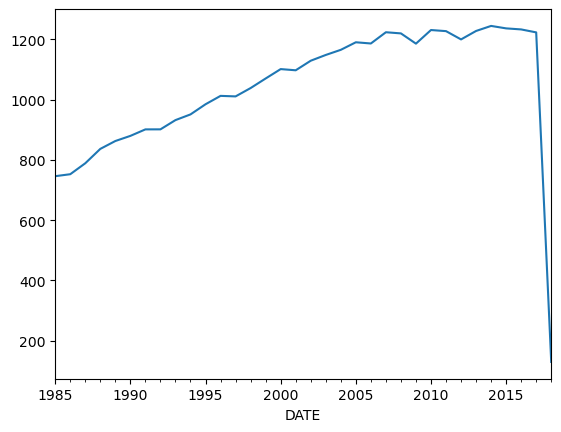

In [39]:
ndf.plot()

In [40]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

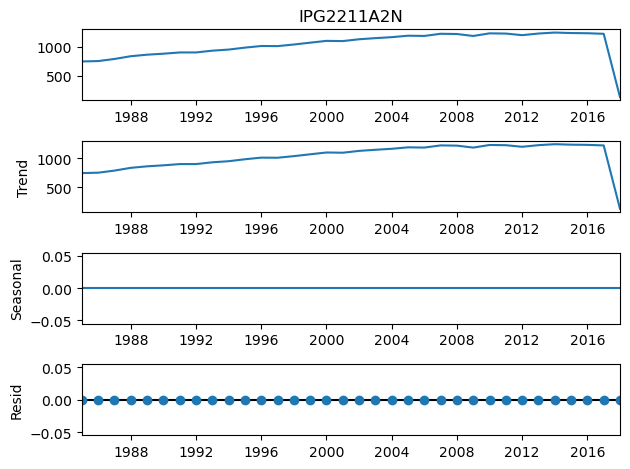

In [41]:
decomposition = sm.tsa.seasonal_decompose(ndf,model='additive')
fig = decomposition.plot()
plt.show()

In [42]:
adftest = adfuller(ndf)

In [43]:
print("p values === ", adftest[1])

p values ===  0.9865253006515157


In [44]:
len(ndf)

34

In [45]:
train_data = ndf[:20]
test_data = ndf[20:]

In [54]:
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [55]:
warnings.filterwarnings('ignore')

In [101]:
mode=ARIMA(train_data,order=(0, 0, 8)).fit()

In [102]:
len(train_data),len(ndf)-1

(20, 33)

In [103]:
pred =mode.predict(start=len(train_data),end=len(ndf)-1)

In [104]:
pred.head()

2005-01-01    1185.489503
2006-01-01    1168.381108
2007-01-01    1133.066796
2008-01-01    1093.399813
2009-01-01    1068.359431
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
error = np.sqrt(mean_squared_error(test_data,pred))
error

296.9840884953731

In [107]:
test_data.mean(),np.sqrt(test_data.var())

(1140.0537857142858, 291.5221650206691)

<Axes: xlabel='DATE'>

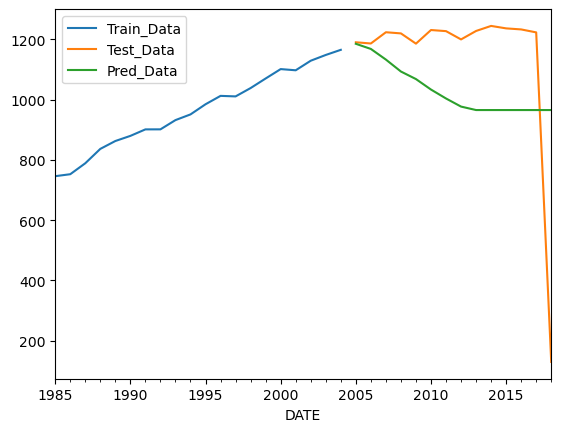

In [108]:
train_data.plot(legend=True,label="Train_Data",fig=(10,6))
test_data.plot(legend=True,label="Test_Data")
pred.plot(legend=True,label="Pred_Data")

In [109]:
final_model=ARIMA(ndf,order=(0, 0, 8)).fit()

In [110]:
prediction_data=mode.predict(start=len(ndf),end=len(ndf)+5)

In [111]:
prediction_data.head()

2019-01-01    965.529177
2020-01-01    965.529177
2021-01-01    965.529177
2022-01-01    965.529177
2023-01-01    965.529177
Freq: AS-JAN, Name: predicted_mean, dtype: float64

<Axes: xlabel='DATE'>

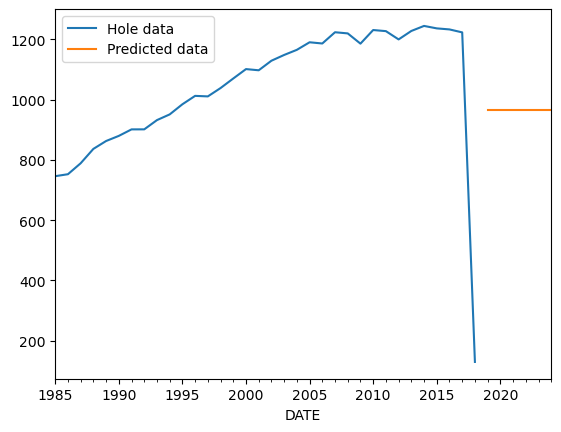

In [112]:
ndf.plot(legend=True,label="Whole data",fig=(10,6))
prediction_data.plot(legend=True,label="Predicted data")

In [ ]:
# How to get ARIMA hyperparameters pdq

In [79]:
import itertools

In [85]:
p=(0,8)
q=(0,8)
d=(0,2)
pdq_combination = list(itertools.product(p,d,q))

In [88]:
len(pdq_combination),pdq_combination

(8,
 [(0, 0, 0),
  (0, 0, 8),
  (0, 2, 0),
  (0, 2, 8),
  (8, 0, 0),
  (8, 0, 8),
  (8, 2, 0),
  (8, 2, 8)])

In [90]:
order1 = []
rmse = []
for pdq in  pdq_combination:
    try:
        model = ARIMA(train_data,order=pdq).fit()
        pred = model.predict(start=len(train_data),end=len(ndf)-1)
        error = np.sqrt(mean_squared_error(test_data,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

In [92]:
results = pd.DataFrame(index=order1,data=rmse,columns=['RMSE'])

In [97]:
display(results)

,RMSE
"(0, 0, 0)",330.690242
"(0, 0, 8)",296.984088
"(0, 2, 0)",350.420589
"(0, 2, 8)",378.984506
"(8, 0, 0)",314.463289
"(8, 2, 0)",374.694239
"(8, 2, 8)",376.385602


In [100]:
results.sort_values(by=['RMSE'])

,RMSE
"(0, 0, 8)",296.984088
"(8, 0, 0)",314.463289
"(0, 0, 0)",330.690242
"(0, 2, 0)",350.420589
"(8, 2, 0)",374.694239
"(8, 2, 8)",376.385602
"(0, 2, 8)",378.984506
